In [ ]:
#library
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

#energy function
def energy (a,return_ev=False):
		n=len(set(a))
		T=np.empty([n,n])
		V=np.empty([n,n])
		H=np.empty([n,n])
		S=np.empty([n,n])
		for i in range(n):
			for j in range(n):
				S[i][j]=np.pi**(3/2)/(a[i]+a[j])**(3/2)
				S[j][i]=S[i][j]
				T[i][j]=3*np.pi**(3/2)*a[i]*a[j]/(a[i]+a[j])**(5/2)
				V[i][j]=-2*np.pi/(a[i]+a[j])
				H[i][j]=T[i][j]+V[i][j]
				H[j][i]=H[i][j]
		eigs = sorted(eigh(H,S,eigvals_only=True))
		if return_ev == False:
			return eigs[0]
		else:
			return eigh(H,S,eigvals=(0,0))
		#print ("ratio:", H[0][0]/S[0][0])
		#print ("eigh: ", eigs[0])

a_exact=8/(np.pi*9)
E_exact=-4/(3*np.pi)
E_calc=energy([a_exact])
print("Calculated value:", E_calc)
print("Exact value:	 ", E_exact)

Calculated value: -0.4244131815783876
Exact value:	  -0.4244131815783876


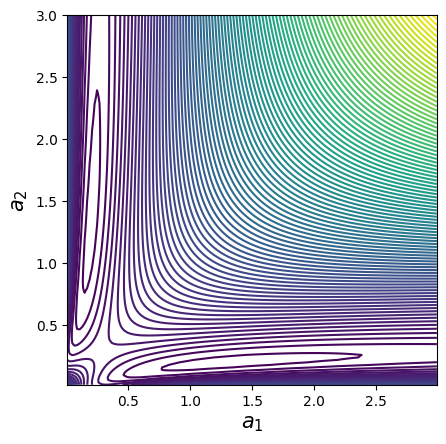

In [ ]:
a1_range=np.arange(0.01,3,1/50)
a2_range=a1_range+0.01
E=np.empty([len(a1_range),len(a2_range)])
X=np.empty([len(a1_range),len(a2_range)])
Y=np.empty([len(a1_range),len(a2_range)])

for i in range(len(a1_range)):
	for j in range(len(a2_range)):
				a=[a1_range[i],a2_range[j]]
				E[i][j] = energy(a)
				X[i][j] = a1_range[i]
				Y[i][j] = a2_range[j]

fig,ax=plt.subplots(1,1)
ax.contour(X,Y,E,levels=100)
ax.set_xlabel(r'$a_1$', fontsize=15)
ax.set_ylabel(r'$a_2$', fontsize=15)
ax.set_aspect(1)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=E)])
#fig.update_traces(legendgrouptitle=dict(...), selector=dict(type='mesh3d'))
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='3D surface plot', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()


N = 1   E_BF= -0.4244131815783876  c_BF [0.27649246]
alpha = [0.28294212] 

N = 2   E_BF= -0.485812716616275  c_BF [0.17604723 0.24254891]
alpha = [0.20152962 1.33249956] 

N = 3   E_BF= -0.49697925270504817  c_BF [0.11202412 0.21799476 0.15519752]
alpha = [0.15137637 0.68128931 4.50036516] 

N = 4   E_BF= -0.4992784057143321  c_BF [0.07370163 0.18559238 0.16302206 0.0960965 ]
alpha = [ 0.12194975  0.44453892  1.96226352 13.01074095] 

N = 5   E_BF= -0.49980983223102843  c_BF [0.04997532 0.15511711 0.16132129 0.10927011 0.06054316]
alpha = [ 0.10307358  0.32723701  1.16470011  5.12384288 34.06367389] 



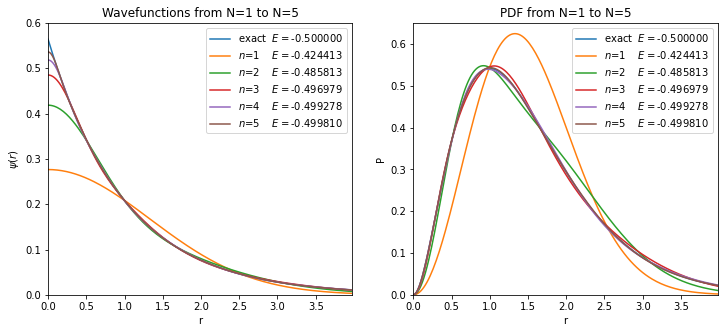

In [ ]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

alpha=[8/(9*np.pi), 1.5,2,4,5]
N=len(alpha)

f,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

r=np.arange(0,4,1/50)
tr_fnc=np.exp(-r)/np.sqrt(np.pi)
ax1.set_title('Wavefunctions from N=1 to N=5')
ax1.plot(r,tr_fnc,label='exact  $E=${:8.6f}'.format(-1/2))
ax1.legend(loc='upper right')
ax1.set_xlabel('r')
ax1.set_ylabel('$\psi(r)$')
ax1.set_ylim([0.0,0.6])
ax1.margins(x=0, tight=True)
ax2.margins(x=0, tight=True)

ax2.set_title('PDF from N=1 to N=5')
ax2.legend(loc='upper right')
ax2.set_xlabel('r')
ax2.set_ylabel('P')
ax2.set_ylim([0.0,0.65])
ax2.plot(r,4*np.pi*r**2*tr_fnc**2,label='exact  $E=${:8.6f}'.format(-1/2))
ax2.legend(loc='upper right')
for i in range(1,N+1):
	ai=alpha[0:i]
	min_bf=minimize(energy, ai, method='BFGS', options={'gtol': 1e-30, 'eps': 1e-30})
	a=min_bf.x
	en_bf, ev_bf=energy(a,return_ev=True)
	en_bf=min_bf.fun
	c_bf=ev_bf[:,0]
	print ("N =",i,"  E_BF=",en_bf, " c_BF", c_bf )
	print ("alpha =",a ,"\n")

	psi=0.0
	pdf=0.0

	for j in range (0,i):
		psi=psi+c_bf[j]*np.exp(-a[j]*r**2)
		pdf=4*np.pi*r**2*psi**2


	ax1.plot(r,psi,label='$n$={0}'.format(i)+'    $E=${:8.6f}'.format(en_bf))
	ax2.plot(r,pdf,label='$n$={0}'.format(i)+'    $E=${:8.6f}'.format(en_bf))
	ax1.legend(loc='upper right')
	ax2.legend(loc='upper right')

plt.show()

In [ ]:
for i in range(1,N+1):
	ai=alpha[0:i]
	min_bf=minimize(energy, ai, method='BFGS', options={'gtol': 1e-30, 'eps': 1e-30})
	a=min_bf.x
	en_bf, ev_bf=energy(a,return_ev=True)
	en_bf=min_bf.fun
	c_bf=ev_bf[:,0]
	print ("N =",i,"  E_BF=",en_bf, " c_BF", c_bf )
	print ("alpha =",a ,"\n")
	min_nm=minimize(energy, ai, method='Nelder-Mead', options={'xtol': 1e-20, 'fatol': 1e-30, 'disp': False})
	a=min_nm.x
	en_nm=energy(a)
	print ("N =",i,"  E_NM=",en_nm )
	print ("alpha =",a ,"\n")

N = 1   E_BF= -0.4244131815783876  c_BF [0.27649246]
alpha = [0.28294212] 

N = 1   E_NM= -0.42441318157838775
alpha = [0.28294212] 

N = 2   E_BF= -0.485812716616275  c_BF [0.17604723 0.24254891]
alpha = [0.20152962 1.33249956] 

N = 2   E_NM= -0.4858127166162753
alpha = [0.20152963 1.33249963] 

N = 3   E_BF= -0.49697925270504817  c_BF [0.11202412 0.21799476 0.15519752]
alpha = [0.15137637 0.68128931 4.50036516] 

N = 3   E_NM= -0.4969792527050516
alpha = [0.15137639 0.68128925 4.50036242] 

N = 4   E_BF= -0.4992784057143321  c_BF [0.07370163 0.18559238 0.16302206 0.0960965 ]
alpha = [ 0.12194975  0.44453892  1.96226352 13.01074095] 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning:

invalid value encountered in double_scalars



ValueError: ignored